# 单张图片

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
#os.chdir(r"C:\Users\AGN's SP\OneDrive\课件\智能计算\识别\object_detection")
from distutils.version import StrictVersion
from matplotlib import pyplot as plt
dict_p = {1:2,2:3}
dict_name = {1:'Nongfu Spring',2:"C'estbon"}

sys.path.append("..")
 
if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')
import cv2

from utils import label_map_util
from utils import visualization_utils as vis_util
CWD_PATH = os.getcwd()
PATH_TO_CKPT = os.path.join(CWD_PATH,'output_model','frozen_inference_graph.pb')
 

PATH_TO_LABELS = os.path.join(CWD_PATH,'data', 'object_detection.pbtxt')
 
NUM_CLASSES = 2
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


C:\Users\AGN's SP\Desktop\object_detection\utils\visualization_utils.py:29: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Progr

In [13]:
image_np = cv2.imread(r"./images/train/12_2_1.jpg")

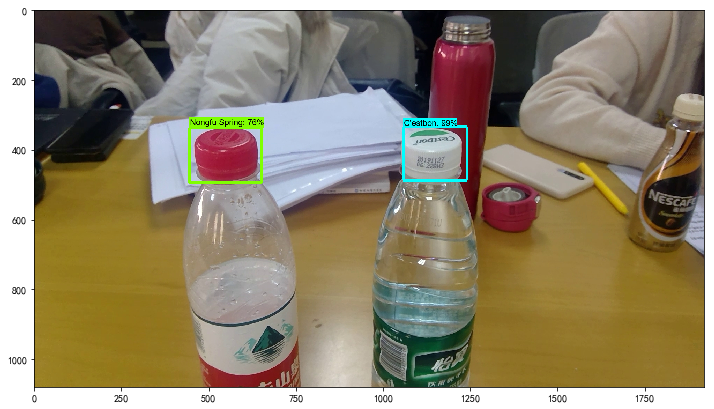

In [14]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image = image_np[:,:,[2,1,0]]
        
        image_np_expanded = np.expand_dims(image, axis=0)
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        (boxes, scores, classes, num_detections) = sess.run(
            [boxes, scores, classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
        
        vis_util.visualize_boxes_and_labels_on_image_array(
            image,np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),category_index,
            use_normalized_coordinates=True,
            line_thickness=8)
        plt.figure(figsize=(12, 12))
        plt.imshow(image)
        plt.show()

# 视频流

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Dec 28 23:39:33 2019

@author: Administrator
"""

import numpy as np
import os
import sys
import tensorflow as tf
from distutils.version import StrictVersion
from matplotlib import pyplot as plt
dict_p = {1:2,2:3}
dict_name = {1:'Nongfu Spring',2:"C'estbon"}
profit=0

sys.path.append("..")
 
if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')
import cv2
#打开摄像头
cap = cv2.VideoCapture(0)

from utils import label_map_util
from utils import visualization_utils as vis_util
CWD_PATH = os.getcwd()
PATH_TO_CKPT = os.path.join(CWD_PATH,'output_model','frozen_inference_graph.pb')
 
# 获取标记名称 类别
PATH_TO_LABELS = os.path.join(CWD_PATH,'data', 'object_detection.pbtxt')
 
NUM_CLASSES = 2
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        while True:
            ret, image_np = cap.read()
            image = image_np[:,:,[2,1,0]]
            
            image_np_expanded = np.expand_dims(image, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # boxes是切分的区域
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # score是概率
            # classes类别
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # 判断
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # 可视化
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
            cv2.imshow('object detection', cv2.resize(image_np, (800,600)))
            key = cv2.waitKey(25) & 0xFF
            if key == ord('a'):
                dict_1 = {1:0,2:0}
                for n in classes[scores>0.5]:
                    dict_1[n]+=1
                vis_util.visualize_boxes_and_labels_on_image_array(
                        image,np.squeeze(boxes),
                        np.squeeze(classes).astype(np.int32),
                        np.squeeze(scores),category_index,
                        use_normalized_coordinates=True,
                        line_thickness=8)
                plt.axis('off')
                plt.imshow(image)
                plt.show()
                print("您已打开柜门。")
            if key == ord('d'):
                dict_2 = {1:0,2:0}
                for n in classes[scores>0.5]:
                    dict_2[n]+=1
                vis_util.visualize_boxes_and_labels_on_image_array(
                        image,np.squeeze(boxes),
                        np.squeeze(classes).astype(np.int32),
                        np.squeeze(scores),category_index,
                        use_normalized_coordinates=True,
                        line_thickness=8)
                plt.axis('off')
                plt.imshow(image)
                plt.show()
                dict_ = {1:0,2:0}
                price = 0
                result = "关闭柜门。结算："
                for n in dict_2.keys():
                    dict_[n] = dict_1[n]-dict_2[n]
                    if dict_[n]>0:
                        price += dict_[n]*dict_p[n]
                        result = result + "{}瓶{}；".format(dict_[n], dict_name[n])
                result = result + "一共需要支付{}元。".format(price)
                profit += price
                print(result)
            if key == ord('s'):
                dict_2 = {1:0,2:0}
                for n in classes[scores>0.5]:
                    dict_2[n]+=1
                vis_util.visualize_boxes_and_labels_on_image_array(
                        image,np.squeeze(boxes),
                        np.squeeze(classes).astype(np.int32),
                        np.squeeze(scores),category_index,
                        use_normalized_coordinates=True,
                        line_thickness=8)
                plt.imshow(image)
                plt.axis('off')
                plt.show()
                result = "当前货柜内还有："
                for n in dict_2.keys():
                    result = result + "{}瓶{}；".format(dict_2[n], dict_name[n])
                result = result + "一共盈利{}元。".format(profit)
                print(result)
            elif key == ord('q'):
                cv2.destroyAllWindows()
                print("系统已退出！")
                break
cap.release()
cv2.destroyAllWindows()

C:\Users\AGN's SP\Desktop\object_detection\utils\visualization_utils.py:29: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Progr

系统已退出！
